In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base2 = automap_base()
Base2.prepare(engine, reflect=True)
#Base = declarative_base
Base2.classes.keys()

['clean_measures', 'clean_stations']

In [3]:
Measures = Base2.classes.clean_measures
Stations = Base2.classes.clean_stations
session = Session(engine)

In [4]:
for row in session.query(Stations, Stations.name).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.clean_stations object at 0x0000020E0366C048>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.clean_stations object at 0x0000020E0366C0B8>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.clean_stations object at 0x0000020E0366C128>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.clean_stations object at 0x0000020E0366C198>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.clean_stations object at 0x0000020E0366C208>, 'UPPER WAHIAWA 874.3, HI US')


In [5]:
for row in session.query(Measures, Measures.name).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.clean_measures object at 0x0000020E0366C518>, None)
(<sqlalchemy.ext.automap.clean_measures object at 0x0000020E0366C588>, None)
(<sqlalchemy.ext.automap.clean_measures object at 0x0000020E0366C5F8>, None)
(<sqlalchemy.ext.automap.clean_measures object at 0x0000020E0366C668>, None)
(<sqlalchemy.ext.automap.clean_measures object at 0x0000020E0366C6D8>, None)


In [6]:
measures = pd.read_csv("Resources/clean_measures.csv")
stations = pd.read_csv("Resources/clean_stations.csv")

In [7]:
measures.head()

,Unnamed: 0,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


In [8]:
stations.head()

,Unnamed: 0,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


Having Trouble getting measurement data to read - I am going to proceed with pandas data frames to plot, although I will write the queries I would have used (otherwise I'll go insane trying to get sqlite to work

In [9]:
## SQL QUERY ##
## SELECT data, prcp
## FROM measurements
## WHERE date > 2018-04-16

In [10]:
measures = pd.read_csv("Resources/hawaii_measurements.csv")
clean_measures = pd.read_csv("Resources/hawaii_measurements.csv")
clean_measures = clean_measures.dropna(how ="any")
clean_measures = clean_measures[["date","prcp"]]
#clean_measures = clean_measures.set_index("date")
clean_measures.head()
#constrained = clean_measures.loc[clean_measures["date"] > "2012-01-01"]
#constrained = constrained.loc[constrained["date"] < "2012-01-10"]
#contrained.head()
constrained = clean_measures.head(10)

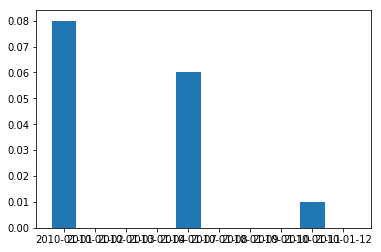

In [11]:
plt.bar(constrained["date"], constrained["prcp"])
#plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-01-30'))
plt.show()

In [12]:
clean_measures.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [13]:
## SQL QUERY TO SELECT TOTAL NUMBER OF STATIONS ##
## SELECT count(name)
## FROM stations

## SQL QUERY TO FIND MOST ACTIVE STATIONS
## SELECT name, count(date)
## FROM measurements
## GROUP_BY name
## ORDER_BY DESC

## SQL QUERY TO FIND 12 MONTHS OF TEMP
## SELECT tobs
## FROM measurements
## WHERE date > 2018-04-16
## GROUP BY name
## ORDER_BY DESC

In [14]:
measures

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
5,USC00519397,2010-01-07,0.06,70
6,USC00519397,2010-01-08,0.00,64
7,USC00519397,2010-01-09,0.00,68
8,USC00519397,2010-01-10,0.00,73
9,USC00519397,2010-01-11,0.01,64


In [15]:
obs = measures
obs = obs.groupby("station").count()
obs

,date,prcp,tobs
station,,,
USC00511918,1979,1932,1979
USC00513117,2709,2696,2709
USC00514830,2202,1937,2202
USC00516128,2612,2484,2612
USC00517948,1372,683,1372
USC00518838,511,342,511
USC00519281,2772,2772,2772
USC00519397,2724,2685,2724
USC00519523,2669,2572,2669


In [16]:
measures = measures.dropna(how= "any")
selected = measures.loc[measures["station"] == "USC00513117"]
#len(selected)
measures.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
5,USC00519397,2010-01-07,0.06,70


In [17]:
bins = [0, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 100000]
labels = ["< 53","53< x <56","56,59","59,62","62,65","65,68","68,71","71,74","74,77","77,80","80,83",">83"]
measures["TEMP_BIN"] = pd.cut(measures["tobs"], bins=bins, labels = labels)
measures.head()

C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,station,date,prcp,tobs,TEMP_BIN
0,USC00519397,2010-01-01,0.08,65,"62,65"
1,USC00519397,2010-01-02,0.00,63,"62,65"
2,USC00519397,2010-01-03,0.00,74,"71,74"
3,USC00519397,2010-01-04,0.00,76,"74,77"
5,USC00519397,2010-01-07,0.06,70,"68,71"


In [19]:
#measures.hist(column:tobs,bins = 12)
#plt.show()

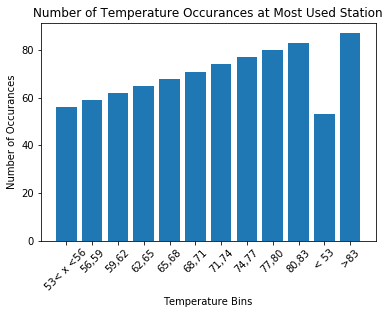

In [20]:
plt.bar(measures["TEMP_BIN"],measures["tobs"])
plt.legend()
plt.xticks(rotation = 45)
plt.xlabel("Temperature Bins")
plt.ylabel("Number of Occurances")
plt.title("Number of Temperature Occurances at Most Used Station")
plt.show()

this most certainly is a strange occurances, steadily increasing occurances. Suggests that this data is not telling the true story - requires deeper dive into what is happening but that won't occur within this homework

In [22]:
## did not do temp box plot

In [23]:
## FLASK
app = Flask(__name__)


@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of dates and temps from last year"""
    # Query all countries from the Invoices table
    results = session.query(measures.dates,measures.tobs).all()

    # Convert list of tuples into normal list
    dates_temps = list(np.ravel(results))

    return jsonify(dates_temps)


@app.route("/api/v1.0/stations")
def stations():
    """Return a list of stations in json."""
    results = session.query(stations.name).all()

    return jsonify(results)

@app.route("/api/v1.0/tobs")
def temps():
    """Return a list of tobs for previous year."""
    results = session.query(measures.tobs).\
        filter(measures.date > 2017-04-17)..all()

    temps = list(np.ravel(results))

    return jsonify(temps)


@app.route("/api/v1.0/<start>")
@app.route("/api/v1.0/invoice/<start>/<end>")
def temp_stats(start, end):
    """Return the temperature stats within the given start and end date."""

    ranged_temps = session.query(func.min(measures.tobs), func.avg(measures.tobs), func.max(measures.tobs).\
        filter(measures.date == stations.date).\
        filter(stations.date > start).\
        filter(stations.date < end).scalar()

    return jsonify(float(ranged_temps))


if __name__ == '__main__':
    app.run()

SyntaxError: invalid token (<ipython-input-23-fea48e4d22cf>, line 27)